# Historical Comparison of Messi and Ronaldo Using FIFA Player Statistics

## **Project Description**
Lionel Messi and Cristiano Ronaldo are two of the greatest football players of all time. Their extraordinary skills, records, and consistency over the years have sparked endless debates among football fans. This project aims to leverage FIFA video game player statistics from FIFA 15 to FIFA 22 to conduct a historical comparison between Messi and Ronaldo.

## **Objective**
The primary goal of this project is to analyse and compare the performance metrics of Messi and Ronaldo over the eight editions of FIFA. Using the dataset, we will explore trends in their overall ratings, attributes, and key skills over time. This analysis seeks to provide insights into their respective strengths, consistency, and evolution as players throughout their careers.

## **Dataset Overview**
The dataset consists of player statistics from FIFA 15 to FIFA 22, provided in the file `players_22.csv`. Each record includes:
- **Player Information**: Name, age, nationality, team.
- **Performance Attributes**: Overall rating, potential, skill moves, pace, dribbling, passing, shooting, etc.
- **Physical Attributes**: Height, weight, and preferred foot.
- **Game Features**: Work rate, player position, and weak foot rating.

## **Scope of the Analysis**
The following analyses will be conducted:
1. **Overall Rating Comparison**: Track the evolution of Messi's and Ronaldo's overall ratings across FIFA editions.
2. **Skill Attribute Analysis**: Compare specific skill attributes such as shooting, passing, dribbling, and pace.
3. **Consistency and Peak Performance**: Identify the years of peak performance and analyze variations in their statistics.
4. **Visual Insights**: Use visualisations to highlight trends and differences between the two players.

## **Significance**
This project provides a data-driven perspective on one of football’s most debated topics. By examining player statistics over time, we aim to complement subjective opinions with an objective analysis of data from a popular football simulation game.

## **Tools and Technologies**
- **Programming Language**: Python
- **Libraries**: Pandas, Matplotlib, Seaborn
- **Data Source**: FIFA Player Statistics Dataset from Kaggle
- **Visualization Tools**: Line charts, bar graphs, radar plots, and heatmaps.

## **Workflow**

### 1. Load and Understand the Dataset

The FIFA datasets for different years were combined into a single DataFrame to allow analysis over time. Each dataset was loaded, and a year column was added based on the file name.

In [21]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os
from math import pi

import matplotlib.pyplot as plt

In [11]:
# Path to your datasets folder
path = r'C:\FIFADataset'

# Get all CSV files matching the pattern
all_files = glob.glob(os.path.join(path,"players_*.csv"))
print(all_files)

['C:\\FIFADataset\\players_15.csv', 'C:\\FIFADataset\\players_16.csv', 'C:\\FIFADataset\\players_17.csv', 'C:\\FIFADataset\\players_18.csv', 'C:\\FIFADataset\\players_19.csv', 'C:\\FIFADataset\\players_20.csv', 'C:\\FIFADataset\\players_21.csv', 'C:\\FIFADataset\\players_22.csv']


In [13]:
df = []
for file in all_files:
    year = int(os.path.basename(file).split('_')[1].split('.')[0]) + 2000
    temp_df = pd.read_csv(file, low_memory=False)
    temp_df['year'] = year
    df.append(temp_df)

In [15]:
# Combine all DataFrames
fifa_data = pd.concat(df, ignore_index=True)
fifa_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png,2015
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png,2015
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png,2015
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png,2015
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png,2015


### 2. Clean and Prepare the Data

- The dataset was filtered to include only Messi and Ronaldo's statistics.
- Missing values were checked and handled appropriately.
- Irrelevant columns were removed to focus on key metrics (e.g., overall, pace, etc.).

In [51]:
messi_ronaldo = fifa_data[fifa_data['short_name'].str.contains("L. Messi|Cristiano Ronaldo")]

In [47]:
print(messi_ronaldo.isnull().sum())

sofifa_id           0
player_url          0
short_name          0
long_name           0
player_positions    0
                   ..
club_logo_url       0
club_flag_url       0
nation_logo_url     1
nation_flag_url     0
year                0
Length: 111, dtype: int64


In [53]:
columns_to_keep = ['short_name', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'year']
messi_ronaldo = messi_ronaldo[columns_to_keep]
messi_ronaldo.head()

,short_name,overall,pace,shooting,passing,dribbling,defending,physic,year
0,L. Messi,93,93.0,89.0,86.0,96.0,27.0,63.0,2015
1,Cristiano Ronaldo,92,93.0,93.0,81.0,91.0,32.0,79.0,2015
16155,L. Messi,94,92.0,88.0,86.0,95.0,24.0,62.0,2016
16156,Cristiano Ronaldo,93,92.0,93.0,80.0,91.0,33.0,78.0,2016
31778,Cristiano Ronaldo,94,92.0,92.0,81.0,91.0,33.0,80.0,2017


### 3. Overall Ratings Analysis

Messi's and Ronaldo's overall ratings were analyzed over the years to identify trends and consistency.

**Visualization:**
A line chart was created to visualize the overall ratings.

In [56]:
ratings = messi_ronaldo.groupby(['short_name', 'year'])['overall'].mean().unstack()
ratings

year,2015,2016,2017,2018,2019,2020,2021,2022
short_name,,,,,,,,
Cristiano Ronaldo,92.0,93.0,94.0,94.0,94.0,93.0,92.0,91.0
L. Messi,93.0,94.0,93.0,93.0,94.0,94.0,93.0,93.0


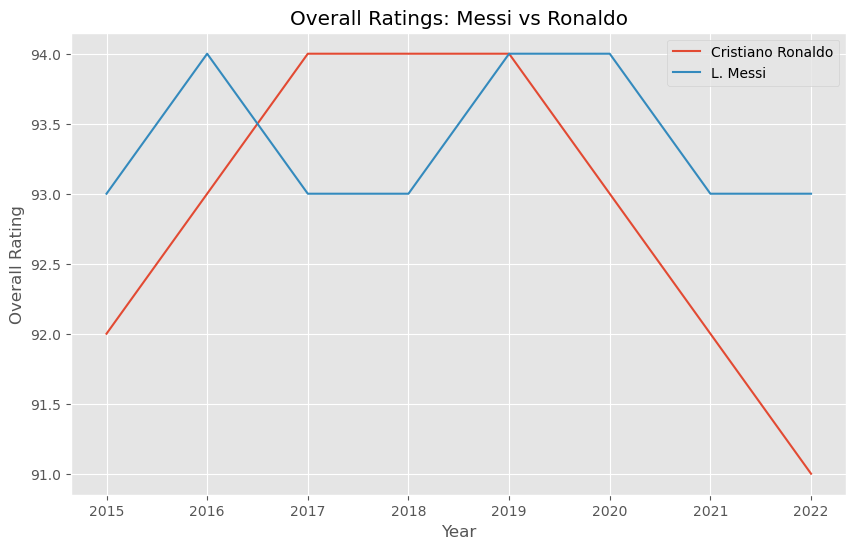

In [58]:
plt.figure(figsize = (10,6))
for player in ratings.index:
    plt.plot(ratings.columns, ratings.loc[player],label = player)
plt.title("Overall Ratings: Messi vs Ronaldo")
plt.xlabel("Year")
plt.ylabel("Overall Rating")
plt.legend()
plt.show()

### 4. Skill Comparison

A radar plot was used to compare Messi’s and Ronaldo’s key attributes, such as pace, shooting, and passing.

**Visualization:**
A radar chart was created using Matplotlib.

In [196]:
# Prepare data for radar plot
attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
messi_avg = messi_ronaldo[messi_ronaldo['short_name']=='L. Messi'][attributes].mean()
ronaldo_avg = messi_ronaldo[messi_ronaldo['short_name']=='Cristiano Ronaldo'][attributes].mean()

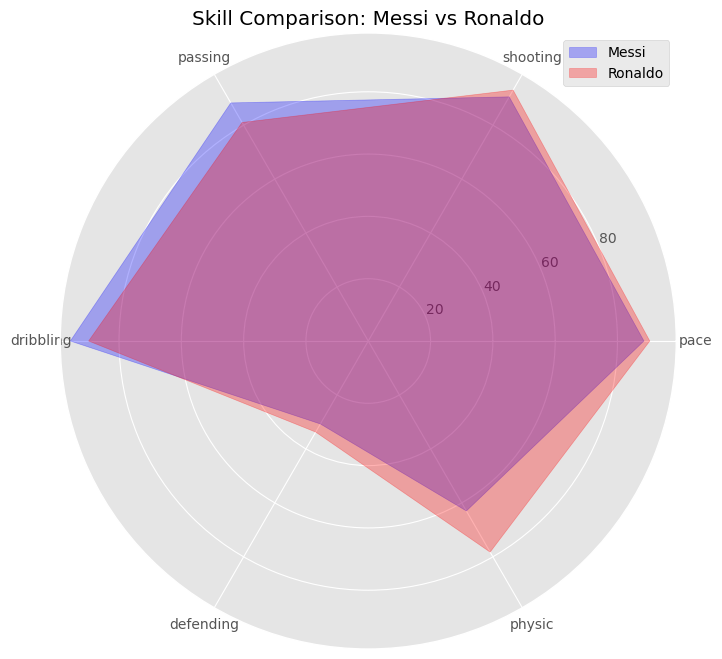

In [198]:
labels = np.array(attributes)
values_messi = messi_avg.values.flatten().tolist() + [messi_avg.values[0]]
values_ronaldo = ronaldo_avg.values.flatten().tolist() + [ronaldo_avg.values[0]]

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values_messi, alpha=0.3, color='blue', label='Messi')
ax.fill(angles, values_ronaldo, alpha=0.3, color='red', label='Ronaldo')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Skill Comparison: Messi vs Ronaldo")
plt.legend()
plt.show()

### 5. Analyze Consistency and Peak Performance

- Found the year with the highest overall rating for each player.
- Year-to-year changes in overall ratings were analyzed to measure consistency.

In [200]:
peak_years = messi_ronaldo.groupby('short_name')['overall'].idxmax()
print(messi_ronaldo.loc[peak_years])

              short_name  overall  pace  shooting  passing  dribbling  \
31778  Cristiano Ronaldo       94  92.0      92.0     81.0       91.0   
16155           L. Messi       94  92.0      88.0     86.0       95.0   

       defending  physic  year  
31778       33.0    80.0  2017  
16155       24.0    62.0  2016  


In [202]:
messi_ronaldo['overall_diff'] = messi_ronaldo.groupby('short_name')['overall'].diff()

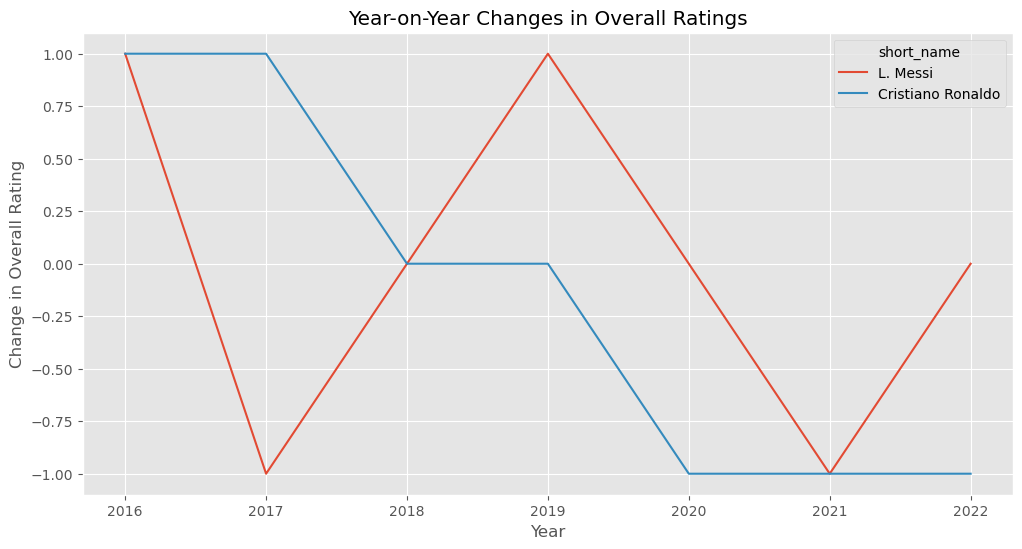

In [204]:
sns.lineplot(data=messi_ronaldo, x='year', y='overall_diff', hue='short_name')
plt.title("Year-on-Year Changes in Overall Ratings")
plt.xlabel("Year")
plt.ylabel("Change in Overall Rating")
plt.show()

### 6. Heatmap of Ratings

A heatmap was created to visualize the overall ratings of Messi and Ronaldo across all years.

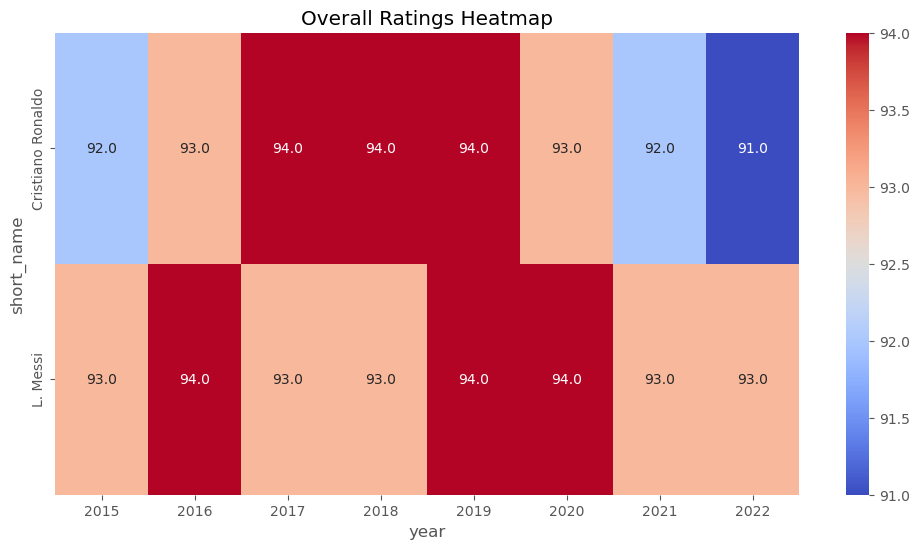

In [206]:
pivot_data = messi_ronaldo.pivot_table(index='short_name', columns='year', values='overall')
sns.heatmap(pivot_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Overall Ratings Heatmap")
plt.show()

## **Conclusions**

**Trends:**
- Messi’s ratings show remarkable consistency, while Ronaldo’s ratings peak earlier in the dataset.

**Skill Comparison:**
- Messi excels in dribbling and passing, while Ronaldo leads in shooting and physical attributes.

**Year-to-Year Variations:**
- Both players show minor declines in later years, reflecting their aging process in the sport.